       Lotarea  TotalBsmtSf  Garagearea  Overallqual  Overallcond  Fullbath  \
0     0.033420     0.140098    0.386460     0.666667        0.500  0.666667   
1     0.038795     0.206547    0.324401     0.555556        0.875  0.666667   
2     0.046507     0.150573    0.428773     0.666667        0.500  0.666667   
3     0.038561     0.123732    0.452750     0.666667        0.500  0.333333   
4     0.060576     0.187398    0.589563     0.777778        0.500  0.666667   
...        ...          ...         ...          ...          ...       ...   
1455  0.030929     0.155974    0.324401     0.555556        0.500  0.666667   
1456  0.055505     0.252373    0.352609     0.555556        0.625  0.666667   
1457  0.036187     0.188543    0.177715     0.666667        1.000  0.666667   
1458  0.039342     0.176432    0.169252     0.444444        0.625  0.333333   
1459  0.040370     0.205565    0.194640     0.444444        0.625  0.333333   

      Halfbath  BedroomAbvgr  TotRmsAbvgrd  firepla

error: [[0.07466872]]
epoch: 179
error: [[0.07464132]]
epoch: 180
error: [[0.0746142]]
epoch: 181
error: [[0.07458738]]
epoch: 182
error: [[0.07456083]]
epoch: 183
error: [[0.07453455]]
epoch: 184
error: [[0.07450853]]
epoch: 185
error: [[0.07448278]]
epoch: 186
error: [[0.07445727]]
epoch: 187
error: [[0.07443201]]
epoch: 188
error: [[0.07440699]]
epoch: 189
error: [[0.0743822]]
epoch: 190
error: [[0.07435764]]
epoch: 191
error: [[0.0743333]]
epoch: 192
error: [[0.07430918]]
epoch: 193
error: [[0.07428526]]
epoch: 194
error: [[0.07426156]]
epoch: 195
error: [[0.07423806]]
epoch: 196
error: [[0.07421475]]
epoch: 197
error: [[0.07419164]]
epoch: 198
error: [[0.07416872]]
epoch: 199
error: [[0.07414598]]
epoch: 200
error: [[0.07412342]]
epoch: 201
error: [[0.07410105]]
epoch: 202
error: [[0.07407884]]
epoch: 203
error: [[0.0740568]]
epoch: 204
error: [[0.07403493]]
epoch: 205
error: [[0.07401323]]
epoch: 206
error: [[0.07399168]]
epoch: 207
error: [[0.07397029]]
epoch: 208
error: [[0.073

error: [[0.07128275]]
epoch: 429
error: [[0.07127639]]
epoch: 430
error: [[0.07127006]]
epoch: 431
error: [[0.07126377]]
epoch: 432
error: [[0.0712575]]
epoch: 433
error: [[0.07125126]]
epoch: 434
error: [[0.07124506]]
epoch: 435
error: [[0.07123889]]
epoch: 436
error: [[0.07123274]]
epoch: 437
error: [[0.07122663]]
epoch: 438
error: [[0.07122055]]
epoch: 439
error: [[0.0712145]]
epoch: 440
error: [[0.07120848]]
epoch: 441
error: [[0.07120248]]
epoch: 442
error: [[0.07119652]]
epoch: 443
error: [[0.07119059]]
epoch: 444
error: [[0.07118468]]
epoch: 445
error: [[0.07117881]]
epoch: 446
error: [[0.07117296]]
epoch: 447
error: [[0.07116714]]
epoch: 448
error: [[0.07116135]]
epoch: 449
error: [[0.07115559]]
epoch: 450
error: [[0.07114986]]
epoch: 451
error: [[0.07114415]]
epoch: 452
error: [[0.07113847]]
epoch: 453
error: [[0.07113282]]
epoch: 454
error: [[0.07112719]]
epoch: 455
error: [[0.0711216]]
epoch: 456
error: [[0.07111603]]
epoch: 457
error: [[0.07111048]]
epoch: 458
error: [[0.07

error: [[0.07030049]]
epoch: 679
error: [[0.07029799]]
epoch: 680
error: [[0.0702955]]
epoch: 681
error: [[0.07029302]]
epoch: 682
error: [[0.07029054]]
epoch: 683
error: [[0.07028807]]
epoch: 684
error: [[0.07028561]]
epoch: 685
error: [[0.07028315]]
epoch: 686
error: [[0.07028069]]
epoch: 687
error: [[0.07027825]]
epoch: 688
error: [[0.07027581]]
epoch: 689
error: [[0.07027338]]
epoch: 690
error: [[0.07027095]]
epoch: 691
error: [[0.07026853]]
epoch: 692
error: [[0.07026611]]
epoch: 693
error: [[0.0702637]]
epoch: 694
error: [[0.0702613]]
epoch: 695
error: [[0.0702589]]
epoch: 696
error: [[0.07025651]]
epoch: 697
error: [[0.07025413]]
epoch: 698
error: [[0.07025175]]
epoch: 699
error: [[0.07024938]]
epoch: 700
error: [[0.07024701]]
epoch: 701
error: [[0.07024465]]
epoch: 702
error: [[0.07024229]]
epoch: 703
error: [[0.07023994]]
epoch: 704
error: [[0.0702376]]
epoch: 705
error: [[0.07023526]]
epoch: 706
error: [[0.07023293]]
epoch: 707
error: [[0.07023061]]
epoch: 708
error: [[0.0702

error: [[0.06982733]]
epoch: 928
error: [[0.06982589]]
epoch: 929
error: [[0.06982446]]
epoch: 930
error: [[0.06982303]]
epoch: 931
error: [[0.0698216]]
epoch: 932
error: [[0.06982017]]
epoch: 933
error: [[0.06981875]]
epoch: 934
error: [[0.06981733]]
epoch: 935
error: [[0.06981591]]
epoch: 936
error: [[0.06981449]]
epoch: 937
error: [[0.06981308]]
epoch: 938
error: [[0.06981167]]
epoch: 939
error: [[0.06981027]]
epoch: 940
error: [[0.06980886]]
epoch: 941
error: [[0.06980746]]
epoch: 942
error: [[0.06980607]]
epoch: 943
error: [[0.06980467]]
epoch: 944
error: [[0.06980328]]
epoch: 945
error: [[0.06980189]]
epoch: 946
error: [[0.06980051]]
epoch: 947
error: [[0.06979912]]
epoch: 948
error: [[0.06979774]]
epoch: 949
error: [[0.06979636]]
epoch: 950
error: [[0.06979499]]
epoch: 951
error: [[0.06979362]]
epoch: 952
error: [[0.06979225]]
epoch: 953
error: [[0.06979088]]
epoch: 954
error: [[0.06978952]]
epoch: 955
error: [[0.06978816]]
epoch: 956
error: [[0.0697868]]
epoch: 957
error: [[0.0

error: [[0.06955124]]
epoch: 1172
error: [[0.06955037]]
epoch: 1173
error: [[0.06954951]]
epoch: 1174
error: [[0.06954864]]
epoch: 1175
error: [[0.06954778]]
epoch: 1176
error: [[0.06954692]]
epoch: 1177
error: [[0.06954606]]
epoch: 1178
error: [[0.06954521]]
epoch: 1179
error: [[0.06954435]]
epoch: 1180
error: [[0.0695435]]
epoch: 1181
error: [[0.06954265]]
epoch: 1182
error: [[0.0695418]]
epoch: 1183
error: [[0.06954095]]
epoch: 1184
error: [[0.06954011]]
epoch: 1185
error: [[0.06953926]]
epoch: 1186
error: [[0.06953842]]
epoch: 1187
error: [[0.06953758]]
epoch: 1188
error: [[0.06953674]]
epoch: 1189
error: [[0.06953591]]
epoch: 1190
error: [[0.06953507]]
epoch: 1191
error: [[0.06953424]]
epoch: 1192
error: [[0.06953341]]
epoch: 1193
error: [[0.06953258]]
epoch: 1194
error: [[0.06953175]]
epoch: 1195
error: [[0.06953093]]
epoch: 1196
error: [[0.0695301]]
epoch: 1197
error: [[0.06952928]]
epoch: 1198
error: [[0.06952846]]
epoch: 1199
error: [[0.06952764]]
epoch: 1200
error: [[0.069526

error: [[0.06938738]]
epoch: 1414
error: [[0.06938687]]
epoch: 1415
error: [[0.06938636]]
epoch: 1416
error: [[0.06938585]]
epoch: 1417
error: [[0.06938534]]
epoch: 1418
error: [[0.06938483]]
epoch: 1419
error: [[0.06938432]]
epoch: 1420
error: [[0.06938381]]
epoch: 1421
error: [[0.06938331]]
epoch: 1422
error: [[0.0693828]]
epoch: 1423
error: [[0.0693823]]
epoch: 1424
error: [[0.06938179]]
epoch: 1425
error: [[0.06938129]]
epoch: 1426
error: [[0.06938079]]
epoch: 1427
error: [[0.06938029]]
epoch: 1428
error: [[0.0693798]]
epoch: 1429
error: [[0.0693793]]
epoch: 1430
error: [[0.0693788]]
epoch: 1431
error: [[0.06937831]]
epoch: 1432
error: [[0.06937781]]
epoch: 1433
error: [[0.06937732]]
epoch: 1434
error: [[0.06937683]]
epoch: 1435
error: [[0.06937634]]
epoch: 1436
error: [[0.06937585]]
epoch: 1437
error: [[0.06937536]]
epoch: 1438
error: [[0.06937487]]
epoch: 1439
error: [[0.06937439]]
epoch: 1440
error: [[0.0693739]]
epoch: 1441
error: [[0.06937342]]
epoch: 1442
error: [[0.06937294]

error: [[0.06929112]]
epoch: 1656
error: [[0.06929082]]
epoch: 1657
error: [[0.06929052]]
epoch: 1658
error: [[0.06929022]]
epoch: 1659
error: [[0.06928992]]
epoch: 1660
error: [[0.06928963]]
epoch: 1661
error: [[0.06928933]]
epoch: 1662
error: [[0.06928903]]
epoch: 1663
error: [[0.06928874]]
epoch: 1664
error: [[0.06928845]]
epoch: 1665
error: [[0.06928815]]
epoch: 1666
error: [[0.06928786]]
epoch: 1667
error: [[0.06928757]]
epoch: 1668
error: [[0.06928727]]
epoch: 1669
error: [[0.06928698]]
epoch: 1670
error: [[0.06928669]]
epoch: 1671
error: [[0.0692864]]
epoch: 1672
error: [[0.06928611]]
epoch: 1673
error: [[0.06928583]]
epoch: 1674
error: [[0.06928554]]
epoch: 1675
error: [[0.06928525]]
epoch: 1676
error: [[0.06928497]]
epoch: 1677
error: [[0.06928468]]
epoch: 1678
error: [[0.06928439]]
epoch: 1679
error: [[0.06928411]]
epoch: 1680
error: [[0.06928383]]
epoch: 1681
error: [[0.06928354]]
epoch: 1682
error: [[0.06928326]]
epoch: 1683
error: [[0.06928298]]
epoch: 1684
error: [[0.0692

error: [[0.06923501]]
epoch: 1898
error: [[0.06923483]]
epoch: 1899
error: [[0.06923466]]
epoch: 1900
error: [[0.06923448]]
epoch: 1901
error: [[0.06923431]]
epoch: 1902
error: [[0.06923414]]
epoch: 1903
error: [[0.06923396]]
epoch: 1904
error: [[0.06923379]]
epoch: 1905
error: [[0.06923362]]
epoch: 1906
error: [[0.06923344]]
epoch: 1907
error: [[0.06923327]]
epoch: 1908
error: [[0.0692331]]
epoch: 1909
error: [[0.06923293]]
epoch: 1910
error: [[0.06923276]]
epoch: 1911
error: [[0.06923259]]
epoch: 1912
error: [[0.06923242]]
epoch: 1913
error: [[0.06923225]]
epoch: 1914
error: [[0.06923208]]
epoch: 1915
error: [[0.06923191]]
epoch: 1916
error: [[0.06923174]]
epoch: 1917
error: [[0.06923157]]
epoch: 1918
error: [[0.0692314]]
epoch: 1919
error: [[0.06923123]]
epoch: 1920
error: [[0.06923107]]
epoch: 1921
error: [[0.0692309]]
epoch: 1922
error: [[0.06923073]]
epoch: 1923
error: [[0.06923057]]
epoch: 1924
error: [[0.0692304]]
epoch: 1925
error: [[0.06923024]]
epoch: 1926
error: [[0.0692300

error: [[0.06920151]]
epoch: 2140
error: [[0.0692014]]
epoch: 2141
error: [[0.06920129]]
epoch: 2142
error: [[0.06920118]]
epoch: 2143
error: [[0.06920107]]
epoch: 2144
error: [[0.06920097]]
epoch: 2145
error: [[0.06920086]]
epoch: 2146
error: [[0.06920075]]
epoch: 2147
error: [[0.06920064]]
epoch: 2148
error: [[0.06920054]]
epoch: 2149
error: [[0.06920043]]
epoch: 2150
error: [[0.06920032]]
epoch: 2151
error: [[0.06920022]]
epoch: 2152
error: [[0.06920011]]
epoch: 2153
error: [[0.0692]]
epoch: 2154
error: [[0.0691999]]
epoch: 2155
error: [[0.06919979]]
epoch: 2156
error: [[0.06919968]]
epoch: 2157
error: [[0.06919958]]
epoch: 2158
error: [[0.06919947]]
epoch: 2159
error: [[0.06919937]]
epoch: 2160
error: [[0.06919926]]
epoch: 2161
error: [[0.06919916]]
epoch: 2162
error: [[0.06919905]]
epoch: 2163
error: [[0.06919895]]
epoch: 2164
error: [[0.06919884]]
epoch: 2165
error: [[0.06919874]]
epoch: 2166
error: [[0.06919863]]
epoch: 2167
error: [[0.06919853]]
epoch: 2168
error: [[0.06919843]

error: [[0.06917921]]
epoch: 2382
error: [[0.06917913]]
epoch: 2383
error: [[0.06917905]]
epoch: 2384
error: [[0.06917897]]
epoch: 2385
error: [[0.06917889]]
epoch: 2386
error: [[0.06917881]]
epoch: 2387
error: [[0.06917873]]
epoch: 2388
error: [[0.06917865]]
epoch: 2389
error: [[0.06917857]]
epoch: 2390
error: [[0.06917849]]
epoch: 2391
error: [[0.0691784]]
epoch: 2392
error: [[0.06917832]]
epoch: 2393
error: [[0.06917824]]
epoch: 2394
error: [[0.06917816]]
epoch: 2395
error: [[0.06917808]]
epoch: 2396
error: [[0.069178]]
epoch: 2397
error: [[0.06917792]]
epoch: 2398
error: [[0.06917784]]
epoch: 2399
error: [[0.06917776]]
epoch: 2400
error: [[0.06917768]]
epoch: 2401
error: [[0.0691776]]
epoch: 2402
error: [[0.06917752]]
epoch: 2403
error: [[0.06917744]]
epoch: 2404
error: [[0.06917736]]
epoch: 2405
error: [[0.06917729]]
epoch: 2406
error: [[0.06917721]]
epoch: 2407
error: [[0.06917713]]
epoch: 2408
error: [[0.06917705]]
epoch: 2409
error: [[0.06917697]]
epoch: 2410
error: [[0.0691768

error: [[0.06916016]]
epoch: 2624
error: [[0.06916008]]
epoch: 2625
error: [[0.06916]]
epoch: 2626
error: [[0.06915992]]
epoch: 2627
error: [[0.06915984]]
epoch: 2628
error: [[0.06915976]]
epoch: 2629
error: [[0.06915968]]
epoch: 2630
error: [[0.0691596]]
epoch: 2631
error: [[0.06915952]]
epoch: 2632
error: [[0.06915944]]
epoch: 2633
error: [[0.06915936]]
epoch: 2634
error: [[0.06915928]]
epoch: 2635
error: [[0.06915919]]
epoch: 2636
error: [[0.06915911]]
epoch: 2637
error: [[0.06915903]]
epoch: 2638
error: [[0.06915895]]
epoch: 2639
error: [[0.06915887]]
epoch: 2640
error: [[0.06915879]]
epoch: 2641
error: [[0.06915871]]
epoch: 2642
error: [[0.06915863]]
epoch: 2643
error: [[0.06915855]]
epoch: 2644
error: [[0.06915846]]
epoch: 2645
error: [[0.06915838]]
epoch: 2646
error: [[0.0691583]]
epoch: 2647
error: [[0.06915822]]
epoch: 2648
error: [[0.06915814]]
epoch: 2649
error: [[0.06915806]]
epoch: 2650
error: [[0.06915798]]
epoch: 2651
error: [[0.06915789]]
epoch: 2652
error: [[0.06915781

error: [[0.06913907]]
epoch: 2866
error: [[0.06913897]]
epoch: 2867
error: [[0.06913888]]
epoch: 2868
error: [[0.06913878]]
epoch: 2869
error: [[0.06913868]]
epoch: 2870
error: [[0.06913859]]
epoch: 2871
error: [[0.06913849]]
epoch: 2872
error: [[0.0691384]]
epoch: 2873
error: [[0.0691383]]
epoch: 2874
error: [[0.06913821]]
epoch: 2875
error: [[0.06913811]]
epoch: 2876
error: [[0.06913801]]
epoch: 2877
error: [[0.06913792]]
epoch: 2878
error: [[0.06913782]]
epoch: 2879
error: [[0.06913772]]
epoch: 2880
error: [[0.06913763]]
epoch: 2881
error: [[0.06913753]]
epoch: 2882
error: [[0.06913743]]
epoch: 2883
error: [[0.06913734]]
epoch: 2884
error: [[0.06913724]]
epoch: 2885
error: [[0.06913714]]
epoch: 2886
error: [[0.06913705]]
epoch: 2887
error: [[0.06913695]]
epoch: 2888
error: [[0.06913685]]
epoch: 2889
error: [[0.06913675]]
epoch: 2890
error: [[0.06913666]]
epoch: 2891
error: [[0.06913656]]
epoch: 2892
error: [[0.06913646]]
epoch: 2893
error: [[0.06913636]]
epoch: 2894
error: [[0.06913

error: [[0.06911281]]
epoch: 3108
error: [[0.06911268]]
epoch: 3109
error: [[0.06911256]]
epoch: 3110
error: [[0.06911243]]
epoch: 3111
error: [[0.0691123]]
epoch: 3112
error: [[0.06911217]]
epoch: 3113
error: [[0.06911204]]
epoch: 3114
error: [[0.06911191]]
epoch: 3115
error: [[0.06911179]]
epoch: 3116
error: [[0.06911166]]
epoch: 3117
error: [[0.06911153]]
epoch: 3118
error: [[0.0691114]]
epoch: 3119
error: [[0.06911127]]
epoch: 3120
error: [[0.06911114]]
epoch: 3121
error: [[0.06911101]]
epoch: 3122
error: [[0.06911088]]
epoch: 3123
error: [[0.06911075]]
epoch: 3124
error: [[0.06911061]]
epoch: 3125
error: [[0.06911048]]
epoch: 3126
error: [[0.06911035]]
epoch: 3127
error: [[0.06911022]]
epoch: 3128
error: [[0.06911009]]
epoch: 3129
error: [[0.06910996]]
epoch: 3130
error: [[0.06910982]]
epoch: 3131
error: [[0.06910969]]
epoch: 3132
error: [[0.06910956]]
epoch: 3133
error: [[0.06910942]]
epoch: 3134
error: [[0.06910929]]
epoch: 3135
error: [[0.06910916]]
epoch: 3136
error: [[0.06910

error: [[0.06907314]]
epoch: 3350
error: [[0.06907293]]
epoch: 3351
error: [[0.06907272]]
epoch: 3352
error: [[0.06907251]]
epoch: 3353
error: [[0.0690723]]
epoch: 3354
error: [[0.06907208]]
epoch: 3355
error: [[0.06907187]]
epoch: 3356
error: [[0.06907166]]
epoch: 3357
error: [[0.06907144]]
epoch: 3358
error: [[0.06907123]]
epoch: 3359
error: [[0.06907101]]
epoch: 3360
error: [[0.0690708]]
epoch: 3361
error: [[0.06907058]]
epoch: 3362
error: [[0.06907037]]
epoch: 3363
error: [[0.06907015]]
epoch: 3364
error: [[0.06906993]]
epoch: 3365
error: [[0.06906971]]
epoch: 3366
error: [[0.0690695]]
epoch: 3367
error: [[0.06906928]]
epoch: 3368
error: [[0.06906906]]
epoch: 3369
error: [[0.06906884]]
epoch: 3370
error: [[0.06906862]]
epoch: 3371
error: [[0.0690684]]
epoch: 3372
error: [[0.06906818]]
epoch: 3373
error: [[0.06906795]]
epoch: 3374
error: [[0.06906773]]
epoch: 3375
error: [[0.06906751]]
epoch: 3376
error: [[0.06906729]]
epoch: 3377
error: [[0.06906706]]
epoch: 3378
error: [[0.0690668

error: [[0.06900597]]
epoch: 3592
error: [[0.06900561]]
epoch: 3593
error: [[0.06900525]]
epoch: 3594
error: [[0.06900489]]
epoch: 3595
error: [[0.06900453]]
epoch: 3596
error: [[0.06900417]]
epoch: 3597
error: [[0.06900381]]
epoch: 3598
error: [[0.06900345]]
epoch: 3599
error: [[0.06900309]]
epoch: 3600
error: [[0.06900273]]
epoch: 3601
error: [[0.06900236]]
epoch: 3602
error: [[0.069002]]
epoch: 3603
error: [[0.06900163]]
epoch: 3604
error: [[0.06900127]]
epoch: 3605
error: [[0.0690009]]
epoch: 3606
error: [[0.06900053]]
epoch: 3607
error: [[0.06900017]]
epoch: 3608
error: [[0.0689998]]
epoch: 3609
error: [[0.06899943]]
epoch: 3610
error: [[0.06899906]]
epoch: 3611
error: [[0.06899869]]
epoch: 3612
error: [[0.06899831]]
epoch: 3613
error: [[0.06899794]]
epoch: 3614
error: [[0.06899757]]
epoch: 3615
error: [[0.06899719]]
epoch: 3616
error: [[0.06899682]]
epoch: 3617
error: [[0.06899644]]
epoch: 3618
error: [[0.06899606]]
epoch: 3619
error: [[0.06899569]]
epoch: 3620
error: [[0.0689953

error: [[0.06889419]]
epoch: 3834
error: [[0.06889361]]
epoch: 3835
error: [[0.06889303]]
epoch: 3836
error: [[0.06889244]]
epoch: 3837
error: [[0.06889186]]
epoch: 3838
error: [[0.06889127]]
epoch: 3839
error: [[0.06889069]]
epoch: 3840
error: [[0.0688901]]
epoch: 3841
error: [[0.06888951]]
epoch: 3842
error: [[0.06888892]]
epoch: 3843
error: [[0.06888833]]
epoch: 3844
error: [[0.06888773]]
epoch: 3845
error: [[0.06888714]]
epoch: 3846
error: [[0.06888654]]
epoch: 3847
error: [[0.06888595]]
epoch: 3848
error: [[0.06888535]]
epoch: 3849
error: [[0.06888475]]
epoch: 3850
error: [[0.06888415]]
epoch: 3851
error: [[0.06888355]]
epoch: 3852
error: [[0.06888295]]
epoch: 3853
error: [[0.06888235]]
epoch: 3854
error: [[0.06888175]]
epoch: 3855
error: [[0.06888114]]
epoch: 3856
error: [[0.06888053]]
epoch: 3857
error: [[0.06887993]]
epoch: 3858
error: [[0.06887932]]
epoch: 3859
error: [[0.06887871]]
epoch: 3860
error: [[0.0688781]]
epoch: 3861
error: [[0.06887749]]
epoch: 3862
error: [[0.06887

error: [[0.06871957]]
epoch: 4076
error: [[0.0687187]]
epoch: 4077
error: [[0.06871784]]
epoch: 4078
error: [[0.06871697]]
epoch: 4079
error: [[0.0687161]]
epoch: 4080
error: [[0.06871522]]
epoch: 4081
error: [[0.06871435]]
epoch: 4082
error: [[0.06871348]]
epoch: 4083
error: [[0.0687126]]
epoch: 4084
error: [[0.06871173]]
epoch: 4085
error: [[0.06871085]]
epoch: 4086
error: [[0.06870997]]
epoch: 4087
error: [[0.06870909]]
epoch: 4088
error: [[0.06870821]]
epoch: 4089
error: [[0.06870733]]
epoch: 4090
error: [[0.06870645]]
epoch: 4091
error: [[0.06870556]]
epoch: 4092
error: [[0.06870468]]
epoch: 4093
error: [[0.06870379]]
epoch: 4094
error: [[0.0687029]]
epoch: 4095
error: [[0.06870201]]
epoch: 4096
error: [[0.06870112]]
epoch: 4097
error: [[0.06870023]]
epoch: 4098
error: [[0.06869934]]
epoch: 4099
error: [[0.06869844]]
epoch: 4100
error: [[0.06869755]]
epoch: 4101
error: [[0.06869665]]
epoch: 4102
error: [[0.06869576]]
epoch: 4103
error: [[0.06869486]]
epoch: 4104
error: [[0.0686939

error: [[0.06847828]]
epoch: 4318
error: [[0.06847717]]
epoch: 4319
error: [[0.06847606]]
epoch: 4320
error: [[0.06847495]]
epoch: 4321
error: [[0.06847384]]
epoch: 4322
error: [[0.06847272]]
epoch: 4323
error: [[0.06847161]]
epoch: 4324
error: [[0.06847049]]
epoch: 4325
error: [[0.06846938]]
epoch: 4326
error: [[0.06846826]]
epoch: 4327
error: [[0.06846715]]
epoch: 4328
error: [[0.06846603]]
epoch: 4329
error: [[0.06846491]]
epoch: 4330
error: [[0.06846379]]
epoch: 4331
error: [[0.06846267]]
epoch: 4332
error: [[0.06846155]]
epoch: 4333
error: [[0.06846043]]
epoch: 4334
error: [[0.06845931]]
epoch: 4335
error: [[0.06845819]]
epoch: 4336
error: [[0.06845706]]
epoch: 4337
error: [[0.06845594]]
epoch: 4338
error: [[0.06845482]]
epoch: 4339
error: [[0.06845369]]
epoch: 4340
error: [[0.06845257]]
epoch: 4341
error: [[0.06845144]]
epoch: 4342
error: [[0.06845031]]
epoch: 4343
error: [[0.06844919]]
epoch: 4344
error: [[0.06844806]]
epoch: 4345
error: [[0.06844693]]
epoch: 4346
error: [[0.068

error: [[0.06819521]]
epoch: 4560
error: [[0.06819401]]
epoch: 4561
error: [[0.06819281]]
epoch: 4562
error: [[0.06819161]]
epoch: 4563
error: [[0.06819041]]
epoch: 4564
error: [[0.06818921]]
epoch: 4565
error: [[0.06818801]]
epoch: 4566
error: [[0.06818681]]
epoch: 4567
error: [[0.06818561]]
epoch: 4568
error: [[0.06818441]]
epoch: 4569
error: [[0.06818321]]
epoch: 4570
error: [[0.06818201]]
epoch: 4571
error: [[0.06818081]]
epoch: 4572
error: [[0.06817961]]
epoch: 4573
error: [[0.06817841]]
epoch: 4574
error: [[0.0681772]]
epoch: 4575
error: [[0.068176]]
epoch: 4576
error: [[0.0681748]]
epoch: 4577
error: [[0.0681736]]
epoch: 4578
error: [[0.0681724]]
epoch: 4579
error: [[0.0681712]]
epoch: 4580
error: [[0.06817]]
epoch: 4581
error: [[0.0681688]]
epoch: 4582
error: [[0.0681676]]
epoch: 4583
error: [[0.0681664]]
epoch: 4584
error: [[0.0681652]]
epoch: 4585
error: [[0.068164]]
epoch: 4586
error: [[0.06816281]]
epoch: 4587
error: [[0.06816161]]
epoch: 4588
error: [[0.06816041]]
epoch: 4

error: [[0.06790829]]
epoch: 4803
error: [[0.06790714]]
epoch: 4804
error: [[0.067906]]
epoch: 4805
error: [[0.06790485]]
epoch: 4806
error: [[0.06790371]]
epoch: 4807
error: [[0.06790257]]
epoch: 4808
error: [[0.06790142]]
epoch: 4809
error: [[0.06790028]]
epoch: 4810
error: [[0.06789914]]
epoch: 4811
error: [[0.067898]]
epoch: 4812
error: [[0.06789686]]
epoch: 4813
error: [[0.06789572]]
epoch: 4814
error: [[0.06789458]]
epoch: 4815
error: [[0.06789344]]
epoch: 4816
error: [[0.0678923]]
epoch: 4817
error: [[0.06789116]]
epoch: 4818
error: [[0.06789002]]
epoch: 4819
error: [[0.06788888]]
epoch: 4820
error: [[0.06788774]]
epoch: 4821
error: [[0.06788661]]
epoch: 4822
error: [[0.06788547]]
epoch: 4823
error: [[0.06788433]]
epoch: 4824
error: [[0.0678832]]
epoch: 4825
error: [[0.06788206]]
epoch: 4826
error: [[0.06788092]]
epoch: 4827
error: [[0.06787979]]
epoch: 4828
error: [[0.06787865]]
epoch: 4829
error: [[0.06787752]]
epoch: 4830
error: [[0.06787639]]
epoch: 4831
error: [[0.06787525]

error: [[0.06764245]]
epoch: 5045
error: [[0.06764139]]
epoch: 5046
error: [[0.06764033]]
epoch: 5047
error: [[0.06763928]]
epoch: 5048
error: [[0.06763822]]
epoch: 5049
error: [[0.06763716]]
epoch: 5050
error: [[0.06763611]]
epoch: 5051
error: [[0.06763505]]
epoch: 5052
error: [[0.067634]]
epoch: 5053
error: [[0.06763294]]
epoch: 5054
error: [[0.06763188]]
epoch: 5055
error: [[0.06763083]]
epoch: 5056
error: [[0.06762977]]
epoch: 5057
error: [[0.06762872]]
epoch: 5058
error: [[0.06762767]]
epoch: 5059
error: [[0.06762661]]
epoch: 5060
error: [[0.06762556]]
epoch: 5061
error: [[0.0676245]]
epoch: 5062
error: [[0.06762345]]
epoch: 5063
error: [[0.0676224]]
epoch: 5064
error: [[0.06762134]]
epoch: 5065
error: [[0.06762029]]
epoch: 5066
error: [[0.06761924]]
epoch: 5067
error: [[0.06761819]]
epoch: 5068
error: [[0.06761713]]
epoch: 5069
error: [[0.06761608]]
epoch: 5070
error: [[0.06761503]]
epoch: 5071
error: [[0.06761398]]
epoch: 5072
error: [[0.06761293]]
epoch: 5073
error: [[0.0676118

error: [[0.06739094]]
epoch: 5287
error: [[0.06738991]]
epoch: 5288
error: [[0.06738887]]
epoch: 5289
error: [[0.06738784]]
epoch: 5290
error: [[0.06738681]]
epoch: 5291
error: [[0.06738578]]
epoch: 5292
error: [[0.06738475]]
epoch: 5293
error: [[0.06738372]]
epoch: 5294
error: [[0.06738269]]
epoch: 5295
error: [[0.06738166]]
epoch: 5296
error: [[0.06738063]]
epoch: 5297
error: [[0.0673796]]
epoch: 5298
error: [[0.06737857]]
epoch: 5299
error: [[0.06737754]]
epoch: 5300
error: [[0.06737651]]
epoch: 5301
error: [[0.06737548]]
epoch: 5302
error: [[0.06737445]]
epoch: 5303
error: [[0.06737342]]
epoch: 5304
error: [[0.06737239]]
epoch: 5305
error: [[0.06737136]]
epoch: 5306
error: [[0.06737033]]
epoch: 5307
error: [[0.0673693]]
epoch: 5308
error: [[0.06736827]]
epoch: 5309
error: [[0.06736724]]
epoch: 5310
error: [[0.06736621]]
epoch: 5311
error: [[0.06736518]]
epoch: 5312
error: [[0.06736415]]
epoch: 5313
error: [[0.06736312]]
epoch: 5314
error: [[0.06736209]]
epoch: 5315
error: [[0.06736

error: [[0.06714421]]
epoch: 5529
error: [[0.06714321]]
epoch: 5530
error: [[0.06714222]]
epoch: 5531
error: [[0.06714122]]
epoch: 5532
error: [[0.06714023]]
epoch: 5533
error: [[0.06713924]]
epoch: 5534
error: [[0.06713824]]
epoch: 5535
error: [[0.06713725]]
epoch: 5536
error: [[0.06713626]]
epoch: 5537
error: [[0.06713527]]
epoch: 5538
error: [[0.06713428]]
epoch: 5539
error: [[0.06713329]]
epoch: 5540
error: [[0.0671323]]
epoch: 5541
error: [[0.06713131]]
epoch: 5542
error: [[0.06713032]]
epoch: 5543
error: [[0.06712933]]
epoch: 5544
error: [[0.06712834]]
epoch: 5545
error: [[0.06712735]]
epoch: 5546
error: [[0.06712636]]
epoch: 5547
error: [[0.06712537]]
epoch: 5548
error: [[0.06712439]]
epoch: 5549
error: [[0.0671234]]
epoch: 5550
error: [[0.06712241]]
epoch: 5551
error: [[0.06712142]]
epoch: 5552
error: [[0.06712044]]
epoch: 5553
error: [[0.06711945]]
epoch: 5554
error: [[0.06711847]]
epoch: 5555
error: [[0.06711748]]
epoch: 5556
error: [[0.0671165]]
epoch: 5557
error: [[0.067115

error: [[0.06691768]]
epoch: 5771
error: [[0.06691682]]
epoch: 5772
error: [[0.06691595]]
epoch: 5773
error: [[0.06691509]]
epoch: 5774
error: [[0.06691423]]
epoch: 5775
error: [[0.06691336]]
epoch: 5776
error: [[0.0669125]]
epoch: 5777
error: [[0.06691164]]
epoch: 5778
error: [[0.06691078]]
epoch: 5779
error: [[0.06690992]]
epoch: 5780
error: [[0.06690906]]
epoch: 5781
error: [[0.06690821]]
epoch: 5782
error: [[0.06690735]]
epoch: 5783
error: [[0.06690649]]
epoch: 5784
error: [[0.06690564]]
epoch: 5785
error: [[0.06690478]]
epoch: 5786
error: [[0.06690392]]
epoch: 5787
error: [[0.06690307]]
epoch: 5788
error: [[0.06690222]]
epoch: 5789
error: [[0.06690136]]
epoch: 5790
error: [[0.06690051]]
epoch: 5791
error: [[0.06689966]]
epoch: 5792
error: [[0.06689881]]
epoch: 5793
error: [[0.06689796]]
epoch: 5794
error: [[0.06689711]]
epoch: 5795
error: [[0.06689626]]
epoch: 5796
error: [[0.06689541]]
epoch: 5797
error: [[0.06689457]]
epoch: 5798
error: [[0.06689372]]
epoch: 5799
error: [[0.0668

error: [[0.06672773]]
epoch: 6013
error: [[0.06672703]]
epoch: 6014
error: [[0.06672632]]
epoch: 6015
error: [[0.06672562]]
epoch: 6016
error: [[0.06672491]]
epoch: 6017
error: [[0.06672421]]
epoch: 6018
error: [[0.0667235]]
epoch: 6019
error: [[0.0667228]]
epoch: 6020
error: [[0.0667221]]
epoch: 6021
error: [[0.0667214]]
epoch: 6022
error: [[0.0667207]]
epoch: 6023
error: [[0.06672]]
epoch: 6024
error: [[0.0667193]]
epoch: 6025
error: [[0.0667186]]
epoch: 6026
error: [[0.0667179]]
epoch: 6027
error: [[0.0667172]]
epoch: 6028
error: [[0.06671651]]
epoch: 6029
error: [[0.06671581]]
epoch: 6030
error: [[0.06671511]]
epoch: 6031
error: [[0.06671442]]
epoch: 6032
error: [[0.06671372]]
epoch: 6033
error: [[0.06671303]]
epoch: 6034
error: [[0.06671234]]
epoch: 6035
error: [[0.06671164]]
epoch: 6036
error: [[0.06671095]]
epoch: 6037
error: [[0.06671026]]
epoch: 6038
error: [[0.06670957]]
epoch: 6039
error: [[0.06670888]]
epoch: 6040
error: [[0.06670819]]
epoch: 6041
error: [[0.0667075]]
epoch

error: [[0.06657359]]
epoch: 6255
error: [[0.06657302]]
epoch: 6256
error: [[0.06657245]]
epoch: 6257
error: [[0.06657188]]
epoch: 6258
error: [[0.06657131]]
epoch: 6259
error: [[0.06657074]]
epoch: 6260
error: [[0.06657017]]
epoch: 6261
error: [[0.0665696]]
epoch: 6262
error: [[0.06656903]]
epoch: 6263
error: [[0.06656846]]
epoch: 6264
error: [[0.06656789]]
epoch: 6265
error: [[0.06656733]]
epoch: 6266
error: [[0.06656676]]
epoch: 6267
error: [[0.06656619]]
epoch: 6268
error: [[0.06656563]]
epoch: 6269
error: [[0.06656506]]
epoch: 6270
error: [[0.0665645]]
epoch: 6271
error: [[0.06656393]]
epoch: 6272
error: [[0.06656337]]
epoch: 6273
error: [[0.0665628]]
epoch: 6274
error: [[0.06656224]]
epoch: 6275
error: [[0.06656168]]
epoch: 6276
error: [[0.06656112]]
epoch: 6277
error: [[0.06656056]]
epoch: 6278
error: [[0.06655999]]
epoch: 6279
error: [[0.06655943]]
epoch: 6280
error: [[0.06655887]]
epoch: 6281
error: [[0.06655831]]
epoch: 6282
error: [[0.06655776]]
epoch: 6283
error: [[0.066557

error: [[0.06644823]]
epoch: 6497
error: [[0.06644776]]
epoch: 6498
error: [[0.06644729]]
epoch: 6499
error: [[0.06644682]]
epoch: 6500
error: [[0.06644636]]
epoch: 6501
error: [[0.06644589]]
epoch: 6502
error: [[0.06644542]]
epoch: 6503
error: [[0.06644496]]
epoch: 6504
error: [[0.06644449]]
epoch: 6505
error: [[0.06644403]]
epoch: 6506
error: [[0.06644356]]
epoch: 6507
error: [[0.0664431]]
epoch: 6508
error: [[0.06644263]]
epoch: 6509
error: [[0.06644217]]
epoch: 6510
error: [[0.06644171]]
epoch: 6511
error: [[0.06644124]]
epoch: 6512
error: [[0.06644078]]
epoch: 6513
error: [[0.06644032]]
epoch: 6514
error: [[0.06643986]]
epoch: 6515
error: [[0.0664394]]
epoch: 6516
error: [[0.06643894]]
epoch: 6517
error: [[0.06643848]]
epoch: 6518
error: [[0.06643801]]
epoch: 6519
error: [[0.06643755]]
epoch: 6520
error: [[0.0664371]]
epoch: 6521
error: [[0.06643664]]
epoch: 6522
error: [[0.06643618]]
epoch: 6523
error: [[0.06643572]]
epoch: 6524
error: [[0.06643526]]
epoch: 6525
error: [[0.066434

error: [[0.06634492]]
epoch: 6739
error: [[0.06634453]]
epoch: 6740
error: [[0.06634414]]
epoch: 6741
error: [[0.06634375]]
epoch: 6742
error: [[0.06634336]]
epoch: 6743
error: [[0.06634297]]
epoch: 6744
error: [[0.06634258]]
epoch: 6745
error: [[0.0663422]]
epoch: 6746
error: [[0.06634181]]
epoch: 6747
error: [[0.06634142]]
epoch: 6748
error: [[0.06634104]]
epoch: 6749
error: [[0.06634065]]
epoch: 6750
error: [[0.06634026]]
epoch: 6751
error: [[0.06633988]]
epoch: 6752
error: [[0.06633949]]
epoch: 6753
error: [[0.06633911]]
epoch: 6754
error: [[0.06633872]]
epoch: 6755
error: [[0.06633834]]
epoch: 6756
error: [[0.06633795]]
epoch: 6757
error: [[0.06633757]]
epoch: 6758
error: [[0.06633719]]
epoch: 6759
error: [[0.0663368]]
epoch: 6760
error: [[0.06633642]]
epoch: 6761
error: [[0.06633604]]
epoch: 6762
error: [[0.06633565]]
epoch: 6763
error: [[0.06633527]]
epoch: 6764
error: [[0.06633489]]
epoch: 6765
error: [[0.06633451]]
epoch: 6766
error: [[0.06633412]]
epoch: 6767
error: [[0.06633

error: [[0.06625822]]
epoch: 6981
error: [[0.06625789]]
epoch: 6982
error: [[0.06625756]]
epoch: 6983
error: [[0.06625723]]
epoch: 6984
error: [[0.0662569]]
epoch: 6985
error: [[0.06625657]]
epoch: 6986
error: [[0.06625624]]
epoch: 6987
error: [[0.06625591]]
epoch: 6988
error: [[0.06625558]]
epoch: 6989
error: [[0.06625525]]
epoch: 6990
error: [[0.06625493]]
epoch: 6991
error: [[0.0662546]]
epoch: 6992
error: [[0.06625427]]
epoch: 6993
error: [[0.06625394]]
epoch: 6994
error: [[0.06625361]]
epoch: 6995
error: [[0.06625329]]
epoch: 6996
error: [[0.06625296]]
epoch: 6997
error: [[0.06625263]]
epoch: 6998
error: [[0.06625231]]
epoch: 6999
error: [[0.06625198]]
epoch: 7000
error: [[0.06625165]]
epoch: 7001
error: [[0.06625133]]
epoch: 7002
error: [[0.066251]]
epoch: 7003
error: [[0.06625068]]
epoch: 7004
error: [[0.06625035]]
epoch: 7005
error: [[0.06625003]]
epoch: 7006
error: [[0.0662497]]
epoch: 7007
error: [[0.06624938]]
epoch: 7008
error: [[0.06624905]]
epoch: 7009
error: [[0.06624873

error: [[0.06618388]]
epoch: 7223
error: [[0.0661836]]
epoch: 7224
error: [[0.06618331]]
epoch: 7225
error: [[0.06618303]]
epoch: 7226
error: [[0.06618274]]
epoch: 7227
error: [[0.06618245]]
epoch: 7228
error: [[0.06618217]]
epoch: 7229
error: [[0.06618188]]
epoch: 7230
error: [[0.0661816]]
epoch: 7231
error: [[0.06618131]]
epoch: 7232
error: [[0.06618103]]
epoch: 7233
error: [[0.06618074]]
epoch: 7234
error: [[0.06618046]]
epoch: 7235
error: [[0.06618017]]
epoch: 7236
error: [[0.06617989]]
epoch: 7237
error: [[0.06617961]]
epoch: 7238
error: [[0.06617932]]
epoch: 7239
error: [[0.06617904]]
epoch: 7240
error: [[0.06617876]]
epoch: 7241
error: [[0.06617847]]
epoch: 7242
error: [[0.06617819]]
epoch: 7243
error: [[0.0661779]]
epoch: 7244
error: [[0.06617762]]
epoch: 7245
error: [[0.06617734]]
epoch: 7246
error: [[0.06617706]]
epoch: 7247
error: [[0.06617677]]
epoch: 7248
error: [[0.06617649]]
epoch: 7249
error: [[0.06617621]]
epoch: 7250
error: [[0.06617593]]
epoch: 7251
error: [[0.066175

error: [[0.06611868]]
epoch: 7465
error: [[0.06611843]]
epoch: 7466
error: [[0.06611817]]
epoch: 7467
error: [[0.06611792]]
epoch: 7468
error: [[0.06611767]]
epoch: 7469
error: [[0.06611741]]
epoch: 7470
error: [[0.06611716]]
epoch: 7471
error: [[0.06611691]]
epoch: 7472
error: [[0.06611665]]
epoch: 7473
error: [[0.0661164]]
epoch: 7474
error: [[0.06611615]]
epoch: 7475
error: [[0.06611589]]
epoch: 7476
error: [[0.06611564]]
epoch: 7477
error: [[0.06611539]]
epoch: 7478
error: [[0.06611514]]
epoch: 7479
error: [[0.06611488]]
epoch: 7480
error: [[0.06611463]]
epoch: 7481
error: [[0.06611438]]
epoch: 7482
error: [[0.06611413]]
epoch: 7483
error: [[0.06611387]]
epoch: 7484
error: [[0.06611362]]
epoch: 7485
error: [[0.06611337]]
epoch: 7486
error: [[0.06611312]]
epoch: 7487
error: [[0.06611287]]
epoch: 7488
error: [[0.06611261]]
epoch: 7489
error: [[0.06611236]]
epoch: 7490
error: [[0.06611211]]
epoch: 7491
error: [[0.06611186]]
epoch: 7492
error: [[0.06611161]]
epoch: 7493
error: [[0.0661

error: [[0.06606017]]
epoch: 7707
error: [[0.06605994]]
epoch: 7708
error: [[0.0660597]]
epoch: 7709
error: [[0.06605947]]
epoch: 7710
error: [[0.06605924]]
epoch: 7711
error: [[0.06605901]]
epoch: 7712
error: [[0.06605878]]
epoch: 7713
error: [[0.06605855]]
epoch: 7714
error: [[0.06605832]]
epoch: 7715
error: [[0.06605809]]
epoch: 7716
error: [[0.06605786]]
epoch: 7717
error: [[0.06605763]]
epoch: 7718
error: [[0.0660574]]
epoch: 7719
error: [[0.06605717]]
epoch: 7720
error: [[0.06605694]]
epoch: 7721
error: [[0.06605671]]
epoch: 7722
error: [[0.06605649]]
epoch: 7723
error: [[0.06605626]]
epoch: 7724
error: [[0.06605603]]
epoch: 7725
error: [[0.0660558]]
epoch: 7726
error: [[0.06605557]]
epoch: 7727
error: [[0.06605534]]
epoch: 7728
error: [[0.06605511]]
epoch: 7729
error: [[0.06605488]]
epoch: 7730
error: [[0.06605465]]
epoch: 7731
error: [[0.06605442]]
epoch: 7732
error: [[0.06605419]]
epoch: 7733
error: [[0.06605397]]
epoch: 7734
error: [[0.06605374]]
epoch: 7735
error: [[0.066053

error: [[0.06600648]]
epoch: 7949
error: [[0.06600627]]
epoch: 7950
error: [[0.06600606]]
epoch: 7951
error: [[0.06600584]]
epoch: 7952
error: [[0.06600563]]
epoch: 7953
error: [[0.06600541]]
epoch: 7954
error: [[0.0660052]]
epoch: 7955
error: [[0.06600499]]
epoch: 7956
error: [[0.06600477]]
epoch: 7957
error: [[0.06600456]]
epoch: 7958
error: [[0.06600435]]
epoch: 7959
error: [[0.06600413]]
epoch: 7960
error: [[0.06600392]]
epoch: 7961
error: [[0.06600371]]
epoch: 7962
error: [[0.06600349]]
epoch: 7963
error: [[0.06600328]]
epoch: 7964
error: [[0.06600307]]
epoch: 7965
error: [[0.06600286]]
epoch: 7966
error: [[0.06600264]]
epoch: 7967
error: [[0.06600243]]
epoch: 7968
error: [[0.06600222]]
epoch: 7969
error: [[0.066002]]
epoch: 7970
error: [[0.06600179]]
epoch: 7971
error: [[0.06600158]]
epoch: 7972
error: [[0.06600137]]
epoch: 7973
error: [[0.06600115]]
epoch: 7974
error: [[0.06600094]]
epoch: 7975
error: [[0.06600073]]
epoch: 7976
error: [[0.06600052]]
epoch: 7977
error: [[0.066000

error: [[0.06595621]]
epoch: 8191
error: [[0.06595601]]
epoch: 8192
error: [[0.0659558]]
epoch: 8193
error: [[0.0659556]]
epoch: 8194
error: [[0.0659554]]
epoch: 8195
error: [[0.0659552]]
epoch: 8196
error: [[0.065955]]
epoch: 8197
error: [[0.06595479]]
epoch: 8198
error: [[0.06595459]]
epoch: 8199
error: [[0.06595439]]
epoch: 8200
error: [[0.06595419]]
epoch: 8201
error: [[0.06595399]]
epoch: 8202
error: [[0.06595378]]
epoch: 8203
error: [[0.06595358]]
epoch: 8204
error: [[0.06595338]]
epoch: 8205
error: [[0.06595318]]
epoch: 8206
error: [[0.06595298]]
epoch: 8207
error: [[0.06595278]]
epoch: 8208
error: [[0.06595257]]
epoch: 8209
error: [[0.06595237]]
epoch: 8210
error: [[0.06595217]]
epoch: 8211
error: [[0.06595197]]
epoch: 8212
error: [[0.06595177]]
epoch: 8213
error: [[0.06595157]]
epoch: 8214
error: [[0.06595136]]
epoch: 8215
error: [[0.06595116]]
epoch: 8216
error: [[0.06595096]]
epoch: 8217
error: [[0.06595076]]
epoch: 8218
error: [[0.06595056]]
epoch: 8219
error: [[0.06595036]

error: [[0.06590823]]
epoch: 8433
error: [[0.06590803]]
epoch: 8434
error: [[0.06590784]]
epoch: 8435
error: [[0.06590764]]
epoch: 8436
error: [[0.06590745]]
epoch: 8437
error: [[0.06590725]]
epoch: 8438
error: [[0.06590706]]
epoch: 8439
error: [[0.06590686]]
epoch: 8440
error: [[0.06590667]]
epoch: 8441
error: [[0.06590647]]
epoch: 8442
error: [[0.06590628]]
epoch: 8443
error: [[0.06590608]]
epoch: 8444
error: [[0.06590589]]
epoch: 8445
error: [[0.06590569]]
epoch: 8446
error: [[0.0659055]]
epoch: 8447
error: [[0.06590531]]
epoch: 8448
error: [[0.06590511]]
epoch: 8449
error: [[0.06590492]]
epoch: 8450
error: [[0.06590472]]
epoch: 8451
error: [[0.06590453]]
epoch: 8452
error: [[0.06590433]]
epoch: 8453
error: [[0.06590414]]
epoch: 8454
error: [[0.06590394]]
epoch: 8455
error: [[0.06590375]]
epoch: 8456
error: [[0.06590356]]
epoch: 8457
error: [[0.06590336]]
epoch: 8458
error: [[0.06590317]]
epoch: 8459
error: [[0.06590297]]
epoch: 8460
error: [[0.06590278]]
epoch: 8461
error: [[0.0659

error: [[0.06586165]]
epoch: 8675
error: [[0.06586146]]
epoch: 8676
error: [[0.06586127]]
epoch: 8677
error: [[0.06586108]]
epoch: 8678
error: [[0.06586089]]
epoch: 8679
error: [[0.0658607]]
epoch: 8680
error: [[0.06586051]]
epoch: 8681
error: [[0.06586032]]
epoch: 8682
error: [[0.06586013]]
epoch: 8683
error: [[0.06585994]]
epoch: 8684
error: [[0.06585975]]
epoch: 8685
error: [[0.06585956]]
epoch: 8686
error: [[0.06585937]]
epoch: 8687
error: [[0.06585918]]
epoch: 8688
error: [[0.06585898]]
epoch: 8689
error: [[0.06585879]]
epoch: 8690
error: [[0.0658586]]
epoch: 8691
error: [[0.06585841]]
epoch: 8692
error: [[0.06585822]]
epoch: 8693
error: [[0.06585803]]
epoch: 8694
error: [[0.06585784]]
epoch: 8695
error: [[0.06585765]]
epoch: 8696
error: [[0.06585746]]
epoch: 8697
error: [[0.06585727]]
epoch: 8698
error: [[0.06585708]]
epoch: 8699
error: [[0.06585689]]
epoch: 8700
error: [[0.0658567]]
epoch: 8701
error: [[0.06585651]]
epoch: 8702
error: [[0.06585632]]
epoch: 8703
error: [[0.065856

error: [[0.0658158]]
epoch: 8917
error: [[0.06581561]]
epoch: 8918
error: [[0.06581543]]
epoch: 8919
error: [[0.06581524]]
epoch: 8920
error: [[0.06581505]]
epoch: 8921
error: [[0.06581486]]
epoch: 8922
error: [[0.06581467]]
epoch: 8923
error: [[0.06581448]]
epoch: 8924
error: [[0.06581429]]
epoch: 8925
error: [[0.0658141]]
epoch: 8926
error: [[0.06581392]]
epoch: 8927
error: [[0.06581373]]
epoch: 8928
error: [[0.06581354]]
epoch: 8929
error: [[0.06581335]]
epoch: 8930
error: [[0.06581316]]
epoch: 8931
error: [[0.06581297]]
epoch: 8932
error: [[0.06581278]]
epoch: 8933
error: [[0.0658126]]
epoch: 8934
error: [[0.06581241]]
epoch: 8935
error: [[0.06581222]]
epoch: 8936
error: [[0.06581203]]
epoch: 8937
error: [[0.06581184]]
epoch: 8938
error: [[0.06581165]]
epoch: 8939
error: [[0.06581146]]
epoch: 8940
error: [[0.06581128]]
epoch: 8941
error: [[0.06581109]]
epoch: 8942
error: [[0.0658109]]
epoch: 8943
error: [[0.06581071]]
epoch: 8944
error: [[0.06581052]]
epoch: 8945
error: [[0.0658103

error: [[0.06577018]]
epoch: 9159
error: [[0.06576999]]
epoch: 9160
error: [[0.0657698]]
epoch: 9161
error: [[0.06576961]]
epoch: 9162
error: [[0.06576942]]
epoch: 9163
error: [[0.06576923]]
epoch: 9164
error: [[0.06576905]]
epoch: 9165
error: [[0.06576886]]
epoch: 9166
error: [[0.06576867]]
epoch: 9167
error: [[0.06576848]]
epoch: 9168
error: [[0.06576829]]
epoch: 9169
error: [[0.0657681]]
epoch: 9170
error: [[0.06576791]]
epoch: 9171
error: [[0.06576773]]
epoch: 9172
error: [[0.06576754]]
epoch: 9173
error: [[0.06576735]]
epoch: 9174
error: [[0.06576716]]
epoch: 9175
error: [[0.06576697]]
epoch: 9176
error: [[0.06576678]]
epoch: 9177
error: [[0.06576659]]
epoch: 9178
error: [[0.06576641]]
epoch: 9179
error: [[0.06576622]]
epoch: 9180
error: [[0.06576603]]
epoch: 9181
error: [[0.06576584]]
epoch: 9182
error: [[0.06576565]]
epoch: 9183
error: [[0.06576546]]
epoch: 9184
error: [[0.06576527]]
epoch: 9185
error: [[0.06576508]]
epoch: 9186
error: [[0.0657649]]
epoch: 9187
error: [[0.065764

error: [[0.06572445]]
epoch: 9401
error: [[0.06572426]]
epoch: 9402
error: [[0.06572407]]
epoch: 9403
error: [[0.06572388]]
epoch: 9404
error: [[0.06572369]]
epoch: 9405
error: [[0.0657235]]
epoch: 9406
error: [[0.06572331]]
epoch: 9407
error: [[0.06572312]]
epoch: 9408
error: [[0.06572293]]
epoch: 9409
error: [[0.06572274]]
epoch: 9410
error: [[0.06572255]]
epoch: 9411
error: [[0.06572236]]
epoch: 9412
error: [[0.06572217]]
epoch: 9413
error: [[0.06572198]]
epoch: 9414
error: [[0.06572179]]
epoch: 9415
error: [[0.0657216]]
epoch: 9416
error: [[0.06572141]]
epoch: 9417
error: [[0.06572122]]
epoch: 9418
error: [[0.06572103]]
epoch: 9419
error: [[0.06572084]]
epoch: 9420
error: [[0.06572066]]
epoch: 9421
error: [[0.06572047]]
epoch: 9422
error: [[0.06572028]]
epoch: 9423
error: [[0.06572009]]
epoch: 9424
error: [[0.0657199]]
epoch: 9425
error: [[0.06571971]]
epoch: 9426
error: [[0.06571952]]
epoch: 9427
error: [[0.06571933]]
epoch: 9428
error: [[0.06571914]]
epoch: 9429
error: [[0.065718

error: [[0.06567844]]
epoch: 9643
error: [[0.06567825]]
epoch: 9644
error: [[0.06567806]]
epoch: 9645
error: [[0.06567787]]
epoch: 9646
error: [[0.06567768]]
epoch: 9647
error: [[0.06567749]]
epoch: 9648
error: [[0.0656773]]
epoch: 9649
error: [[0.06567711]]
epoch: 9650
error: [[0.06567692]]
epoch: 9651
error: [[0.06567673]]
epoch: 9652
error: [[0.06567654]]
epoch: 9653
error: [[0.06567634]]
epoch: 9654
error: [[0.06567615]]
epoch: 9655
error: [[0.06567596]]
epoch: 9656
error: [[0.06567577]]
epoch: 9657
error: [[0.06567558]]
epoch: 9658
error: [[0.06567539]]
epoch: 9659
error: [[0.0656752]]
epoch: 9660
error: [[0.06567501]]
epoch: 9661
error: [[0.06567482]]
epoch: 9662
error: [[0.06567463]]
epoch: 9663
error: [[0.06567444]]
epoch: 9664
error: [[0.06567425]]
epoch: 9665
error: [[0.06567406]]
epoch: 9666
error: [[0.06567386]]
epoch: 9667
error: [[0.06567367]]
epoch: 9668
error: [[0.06567348]]
epoch: 9669
error: [[0.06567329]]
epoch: 9670
error: [[0.0656731]]
epoch: 9671
error: [[0.065672

error: [[0.06563215]]
epoch: 9885
error: [[0.06563196]]
epoch: 9886
error: [[0.06563177]]
epoch: 9887
error: [[0.06563157]]
epoch: 9888
error: [[0.06563138]]
epoch: 9889
error: [[0.06563119]]
epoch: 9890
error: [[0.065631]]
epoch: 9891
error: [[0.06563081]]
epoch: 9892
error: [[0.06563061]]
epoch: 9893
error: [[0.06563042]]
epoch: 9894
error: [[0.06563023]]
epoch: 9895
error: [[0.06563004]]
epoch: 9896
error: [[0.06562985]]
epoch: 9897
error: [[0.06562966]]
epoch: 9898
error: [[0.06562946]]
epoch: 9899
error: [[0.06562927]]
epoch: 9900
error: [[0.06562908]]
epoch: 9901
error: [[0.06562889]]
epoch: 9902
error: [[0.0656287]]
epoch: 9903
error: [[0.0656285]]
epoch: 9904
error: [[0.06562831]]
epoch: 9905
error: [[0.06562812]]
epoch: 9906
error: [[0.06562793]]
epoch: 9907
error: [[0.06562774]]
epoch: 9908
error: [[0.06562754]]
epoch: 9909
error: [[0.06562735]]
epoch: 9910
error: [[0.06562716]]
epoch: 9911
error: [[0.06562697]]
epoch: 9912
error: [[0.06562678]]
epoch: 9913
error: [[0.0656265

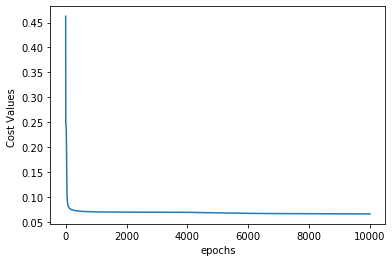

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(y):
      return (1/(1+np.exp(-y)))
    
def sigmoid_derivative(x): 
      return sigmoid(x)*(1 - sigmoid(x)) 
    
def tanh_derivative(x):
    return 1/(np.cosh(x))**2

def binary_cross_entropy(t,y):
    return (t-y)**2

def normalize(max,min,x):
    return ((x-min)/(max-min))


df=pd.read_csv('housepricedata.csv')
Lotarea=[]
TotalBsmtSf=[]
Garagearea=[]
Overallqual=[]
Overallcond=[]
Fullbath=[]
Halfbath=[]
BedroomAbvgr=[]
TotRmsAbvgrd=[]
fireplaces=[]
for i in range(len(df)):
    Lotarea.append(normalize(df.LotArea.max(),df.LotArea.min(),df.LotArea[i]))
    TotalBsmtSf.append(normalize(df.TotalBsmtSF.max(),df.TotalBsmtSF.min(),df.TotalBsmtSF[i]))
    Garagearea.append(normalize(df.GarageArea.max(),df.GarageArea.min(),df.GarageArea[i]))
    Overallqual.append(normalize(df.OverallQual.max(),df.OverallQual.min(),df.OverallQual[i]))
    Overallcond.append(normalize(df.OverallCond.max(),df.OverallCond.min(),df.OverallCond[i]))
    Fullbath.append(normalize(df.FullBath.max(),df.FullBath.min(),df.FullBath[i]))
    Halfbath.append(normalize(df.HalfBath.max(),df.HalfBath.min(),df.HalfBath[i]))
    BedroomAbvgr.append(normalize(df.BedroomAbvGr.max(),df.BedroomAbvGr.min(),df.BedroomAbvGr[i]))
    TotRmsAbvgrd.append(normalize(df.TotRmsAbvGrd.max(),df.TotRmsAbvGrd.min(),df.TotRmsAbvGrd[i]))
    fireplaces.append(normalize(df.Fireplaces.max(),df.Fireplaces.min(),df.Fireplaces[i]))
    i+=1
Lotarea=pd.DataFrame(Lotarea,columns=['Lotarea'])
TotalBsmtSf=pd.DataFrame(data=TotalBsmtSf,columns=['TotalBsmtSf'])
Garagearea=pd.DataFrame(Garagearea,columns=['Garagearea'])
Overallqual=pd.DataFrame(Overallqual,columns=['Overallqual'])
Overallcond=pd.DataFrame(Overallcond,columns=['Overallcond'])
Fullbath=pd.DataFrame(Fullbath,columns=['Fullbath'])
Halfbath=pd.DataFrame(Halfbath,columns=['Halfbath'])
BedroomAbvgr=pd.DataFrame(BedroomAbvgr,columns=['BedroomAbvgr'])
TotRmsAbvgrd=pd.DataFrame(TotRmsAbvgrd,columns=['TotRmsAbvgrd'])
fireplaces=pd.DataFrame(fireplaces,columns=['fireplaces'])

df=df.drop(columns=['LotArea','TotalBsmtSF','GarageArea','OverallQual','OverallCond','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces'])
frames=[Lotarea,TotalBsmtSf,Garagearea,Overallqual,Overallcond,Fullbath,Halfbath,BedroomAbvgr,TotRmsAbvgrd,fireplaces,df]
df=pd.concat(frames,axis=1)
#df.rename(columns=0:"LotArea","0":"TotalBsmtSF","0":"GarageArea")
print(df)
df1=df.sample(frac=0.8,random_state=1011)
df2=df.drop(df1.index)
X_train=df1.drop(columns=['AboveMedianPrice'])
Y_train=df1['AboveMedianPrice']
X_test=df2.drop(columns='AboveMedianPrice')
Y_test=df2['AboveMedianPrice']
x_train=np.array(X_train)
print(x_train[0,:])
y_train=np.array(Y_train)

print(x_train)

#Initializations
M=7
w=np.random.rand(M,10)
v=np.random.rand(1,M)
wo=np.random.rand(M,1)
vo=np.random.rand(1,1)
k=0
i=0
epochs=[]
error_values=[]
error=0
alpha=0.005
for k in range(10000):
    error=0
    for i in range(len(x_train)):
        a=[]
        z=[]
        
        a=(x_train[i]).dot(w.T)+(wo.T)
        #print('a:',a)
        z=np.tanh(a)
        #print('z',z)
        z=np.array(z)
        y_in=(z).dot(v.T)+vo
        y=sigmoid(y_in)
        #print(y)
        error+=binary_cross_entropy(y_train[i],y)
        err_corr_2=(y_train[i]-y)*(sigmoid_derivative(y))
        j=0
        vo=vo+(alpha)*(err_corr_2)
        err_corr_1=[]
        
        for j in range(M):
            v[:,j]=v[:,j]+(alpha)*(err_corr_2)*(z[:,j])
            err_corr_1.append((err_corr_2)*(v[:,j])*(tanh_derivative(z[:,j])))
            j+=1
        #print('err_1',err_corr_1[0])
        j=0
        l=0
        #print(w)
        for j in range(M):
            for l in range(10):
                w[j,l]=w[j,l]+alpha*((err_corr_1[j]))*(x_train[i,l])
                l=l+1
            wo[j]=wo[j]+(alpha)*(err_corr_1[j])
            j=j+1
        #print('w',w)
        i+=1
    
    print('error:',error/len(X_train))
    print('epoch:',k)
    error_values.append(np.asscalar(error/len(X_train)))
    epochs.append(k)
    k+=1

plt.plot(epochs,error_values)
plt.ylabel("Cost Values ")
plt.xlabel("epochs")
plt.show()          


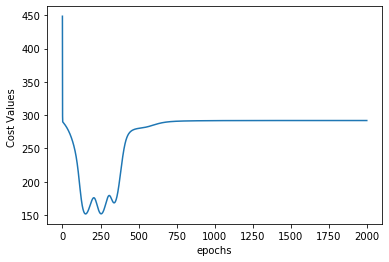

In [4]:
plt.plot(epochs,error_values)
plt.ylabel("Cost Values ")
plt.xlabel("epochs")
plt.show()  

In [ ]:
#normalization partially

Lotarea=[]
TotalBsmtSf=[]
Garagearea=[]
for i in range(len(df)):
    Lotarea.append(normalize(df.LotArea.max(),df.LotArea.min(),df.LotArea[i]))
    TotalBsmtSf.append(normalize(df.TotalBsmtSF.max(),df.TotalBsmtSF.min(),df.TotalBsmtSF[i]))
    Garagearea.append(normalize(df.GarageArea.max(),df.GarageArea.min(),df.GarageArea[i]))
    i+=1
Lotarea=pd.DataFrame(Lotarea,columns=['Lotarea'])
TotalBsmtSf=pd.DataFrame(data=TotalBsmtSf,columns=['TotalBsmtSf'])
Garagearea=pd.DataFrame(Garagearea,columns=['Garagearea'])
df=df.drop(columns=['LotArea','TotalBsmtSF','GarageArea'])
frames=[Lotarea,TotalBsmtSf,Garagearea,df]
df=pd.concat(frames,axis=1)




(-t*(np.log(y))-(1-t)*(np.log((1-y))))